In [202]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import matplotlib.ticker as mticker
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
register_matplotlib_converters()
def parse_date(x):
    return datetime.strptime(x, "%Y-%m-%d")
df = pd.read_csv("fcc-forum-pageviews.csv",index_col=["date"],parse_dates=["date"],date_parser=parse_date,)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [203]:
#Clean the data by filtering out days when the page views were in 
# the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df["value"] >= df["value"].quantile(0.025)) &(df["value"] <= df["value"].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


AttributeError: 'list' object has no attribute 'grid'

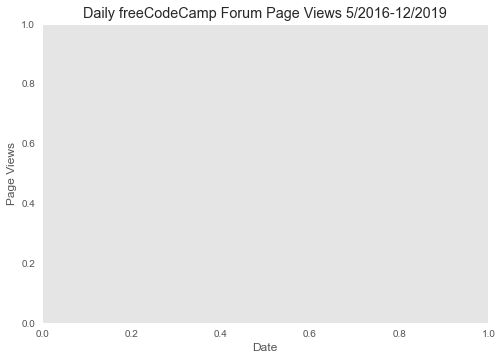

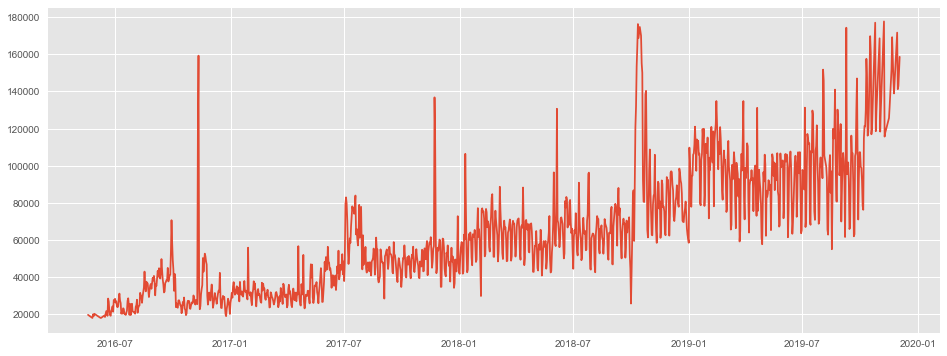

In [209]:

x=df.index
y=df['value']
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel("Date")
plt.ylabel('Page Views')
plt.grid(visible=False)
plt.figure(figsize=(16,6))
fig=plt.plot(x,y)
fig.grid(visible=False)


In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [211]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(16, 6))

    ax = sns.lineplot(data=df, x="date", y="value")

    ax.set(xlabel="Date",ylabel="Page Views",)

    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

    return fig


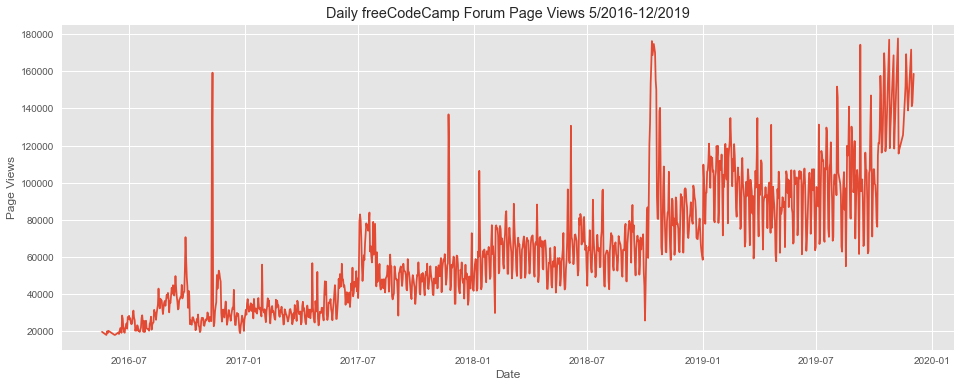

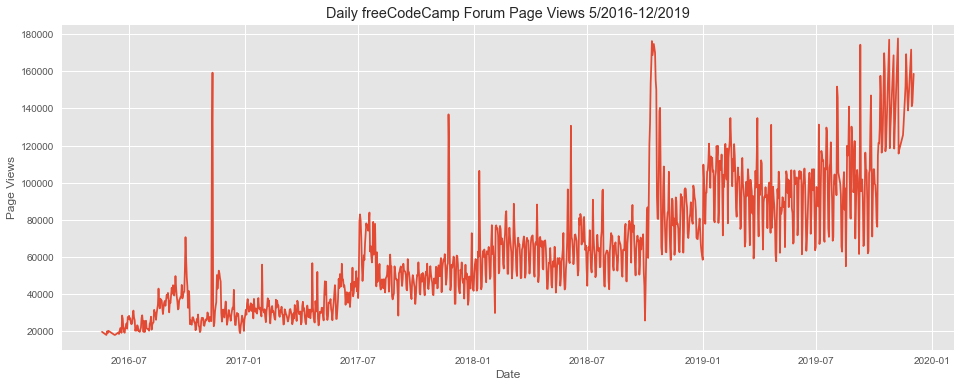

In [212]:
draw_line_plot()